In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs, make_circles, make_moons)

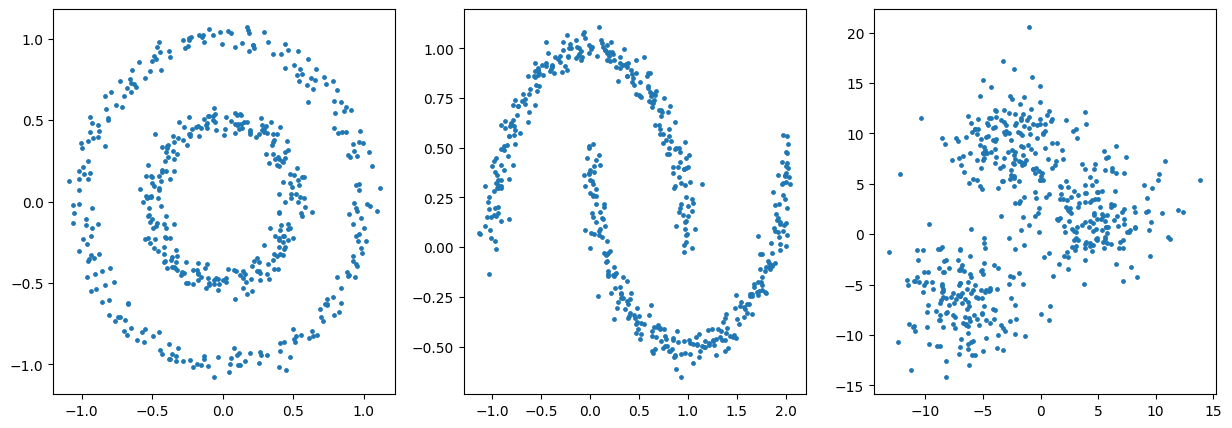

In [2]:
X1 = make_circles(factor=0.5, noise=0.05, n_samples=500)
X2 = make_moons(n_samples=500, noise=0.05)
X3 = make_blobs(n_samples=500, random_state=42, cluster_std=3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X1[0][:, 0], X1[0][:, 1], s=6)

plt.subplot(1, 3, 2)
plt.scatter(X2[0][:, 0], X2[0][:, 1], s=6)

plt.subplot(1, 3, 3)
plt.scatter(X3[0][:, 0], X3[0][:, 1], s=6)

plt.show()
# X1[0]

In [4]:
def density_dist(X, n=10):
    # Find the min and max coordinates
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    # Determine the width and height of the bounding rectangle
    width = max_x - min_x
    height = max_y - min_y

    # Determine the grid cell size
    grid_cell_width = width / n
    grid_cell_height = height / n

    # Create a 2D array to hold the counts of points in each grid cell
    grid_counts = np.zeros((n, n), dtype=int)

    # Iterate over each point in the dataset
    for x, y in X:
        # Determine which grid cell the point falls into
        cell_x = int((x - min_x) / grid_cell_width)
        cell_y = int((y - min_y) / grid_cell_height)
        
        # Ensure the indices are within the bounds of the grid
        cell_x = min(cell_x, n - 1)
        cell_y = min(cell_y, n - 1)
        
        # Increment the count for the corresponding grid cell
        grid_counts[cell_y, cell_x] += 1  # Note: (cell_y, cell_x) to maintain conventional row-column order

    return grid_counts


In [5]:
li = density_dist(X1[0], n=10)
sns.histplot(li.flatten(), bins=20, kde=True, cumulative=True)

<AxesSubplot:ylabel='Count'>

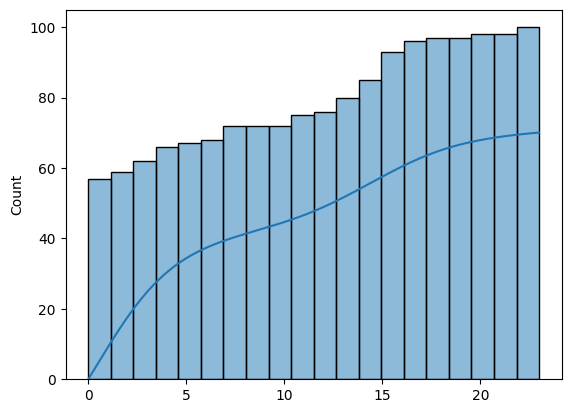

In [25]:
li = density_dist(X2[0], n=10)
sns.histplot(li.flatten(), bins=20, kde=True, cumulative=True)

<AxesSubplot:ylabel='Count'>

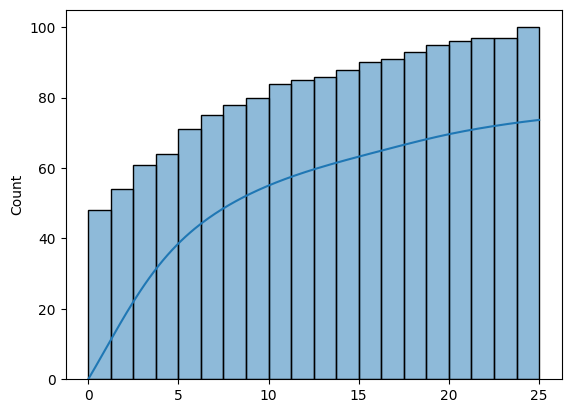

In [28]:
li = density_dist(X3[0], n=10)
sns.histplot(li.flatten(), bins=20, kde=True, cumulative=True)

In [14]:
li

array([[ 0,  0,  3, 10,  7, 10,  9,  2,  0,  0],
       [ 0,  7,  6,  0,  0,  0,  0,  8,  5,  0],
       [ 4,  6,  0,  4, 16, 11,  4,  0, 10,  2],
       [ 8,  2,  6, 19,  4,  6, 19,  2,  0,  8],
       [10,  0, 10,  5,  0,  0,  9,  7,  0, 12],
       [ 8,  0, 17,  4,  0,  0,  2, 15,  0,  4],
       [ 7,  1,  3, 17,  2,  3, 20,  2,  4,  8],
       [ 4,  5,  0,  4, 15, 16,  8,  1,  6,  2],
       [ 0,  7,  8,  0,  0,  0,  1, 10,  4,  0],
       [ 0,  0,  6,  8,  8, 11,  5,  3,  0,  0]])

<AxesSubplot:ylabel='Count'>

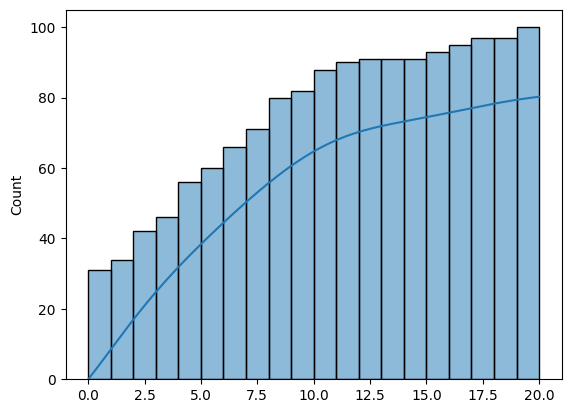

In [18]:
sns.histplot(li.flatten(), bins=20, kde=True, cumulative=True)

<AxesSubplot:ylabel='Count'>

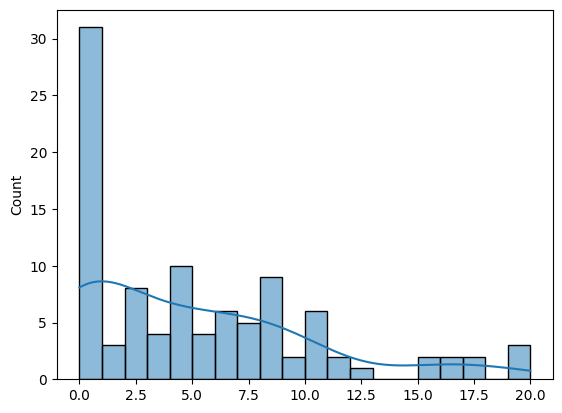

In [19]:
sns.histplot(li.flatten(), bins=20, kde=True)

In [16]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

In [3]:
def gaussian(x, y, x0, y0, sigma=1):
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

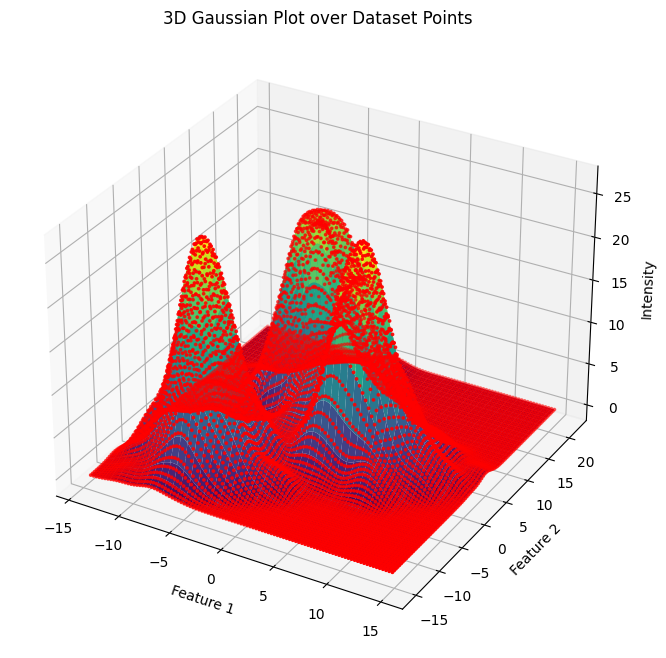

In [4]:
X = X3[0]

s = 1
# Function to generate a Gaussian peak at each data point

# Meshgrid for evaluation
grid = 400
x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, grid+1)
y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, grid+1)
x, y = np.meshgrid(x, y)

# Compute the sum of Gaussians at each grid point
z = np.zeros_like(x)
for point in X:
    z += gaussian(x, y, point[0], point[1], 1.2)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('3D Gaussian Plot over Dataset Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Intensity')


# add ball
ball = 100
ball_x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, ball+1)
ball_y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, ball+1)
ball_x, ball_y = np.meshgrid(ball_x, ball_y)

ball_z = np.array([[z[i][j] for j in np.arange(0, 400+400//ball, 400//ball)] for i in np.arange(0, 400+400//ball, 400//ball)])

ax.scatter3D(ball_x, ball_y, ball_z, c='r', s=3)

plt.show()

Text(0.5, 0, 'Intensity')

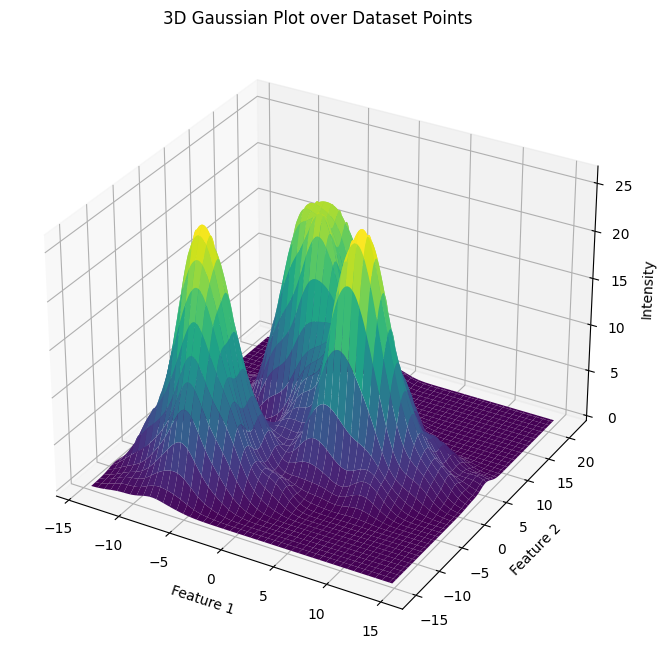

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('3D Gaussian Plot over Dataset Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Intensity')

In [14]:
def plot_level(level_bin_array, size1 = 2, sigma=1):
    gen_num = len(level_bin_array)
    rows = gen_num//10 + 1
    plt.figure(figsize=(size1*10, size1*rows))

    for i in range(len(level_bin_array)):
        plt.subplot(rows, 10, i+1)
        plt.title(f"gen : {i}")
        plt.axis("off")
        plt.imshow(level_bin_array[i], cmap='gray')

    # plt.show()
    plt.savefig(f"./img/sigma {sigma}.png")

In [15]:
def gen_simul(data, grid, ball, sigma, gen_num):
    X = data
    x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, grid+1)
    y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, grid+1)
    x, y = np.meshgrid(x, y)

    # Compute the sum of Gaussians at each grid point
    z = np.zeros_like(x)
    for point in X:
        z += gaussian(x, y, point[0], point[1], sigma=sigma)

    # add ball
    ball_x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, ball+1)
    ball_y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, ball+1)
    ball_x, ball_y = np.meshgrid(ball_x, ball_y)

    ball_z = np.array([[z[i][j] for j in np.arange(0, 400+400//ball, 400//ball)] for i in np.arange(0, 400+400//ball, 400//ball)])

    # iter
    delta = [[-1, 0], [1, 0], [0, -1], [0, 1]]

    level = np.zeros((ball+3, ball+3))
    level[1:ball+2, 1:ball+2] = ball_z.copy()

    level_array = [level.copy()]

    level_bin = np.zeros((ball+3, ball+3))
    level_bin[1:ball+2, 1:ball+2] = np.ones((ball+1, ball+1))
    level_bin_array = [level_bin]

    gen = 1
    while gen < gen_num:
        temp = level.copy()
        temp_bin = level_bin.copy()
        for i in range(1, ball+2):
            for j in range(1, ball+2):
                flag = 1
                for d in delta:
                    if level[i+d[0], j+d[1]] > level[i, j]:  # 부등호에서 등호 삭제(edge 처리 문제)
                        flag = 0
                        break
                if flag:
                    temp[i, j] = 0
                    temp_bin[i, j] = 0

        gen += 1
        level_array.append(temp)
        level_bin_array.append(temp_bin)

        level = temp
        level_bin = temp_bin

    plot_level(level_bin_array, size1=2, sigma=sigma)

In [ ]:
# gen_simul(X1[0], 400, 100, 0.05, 50)

In [ ]:
# gen_simul(X2[0], 400, 100, 0.2, 50)

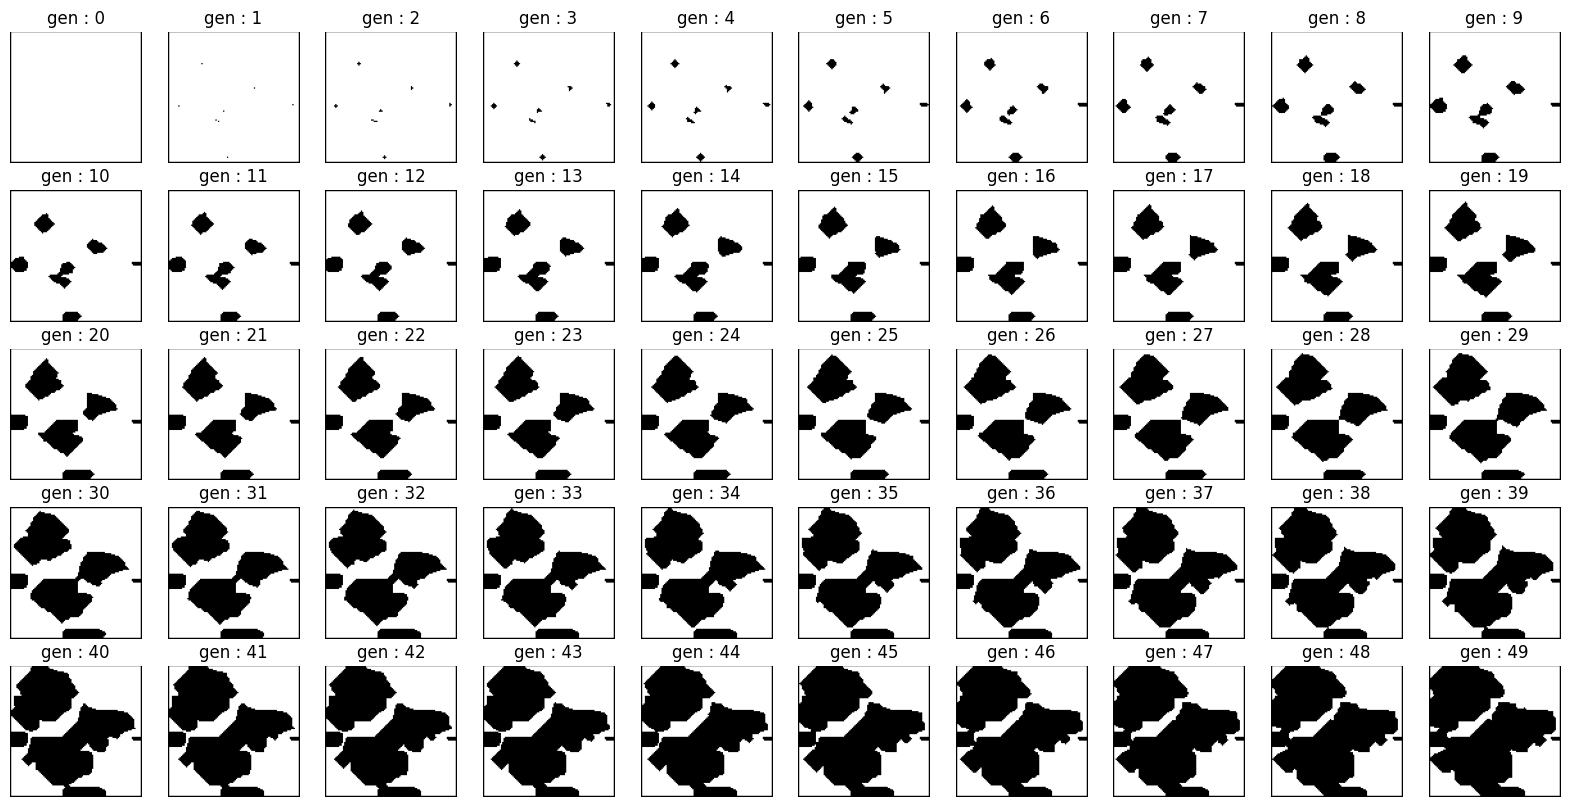

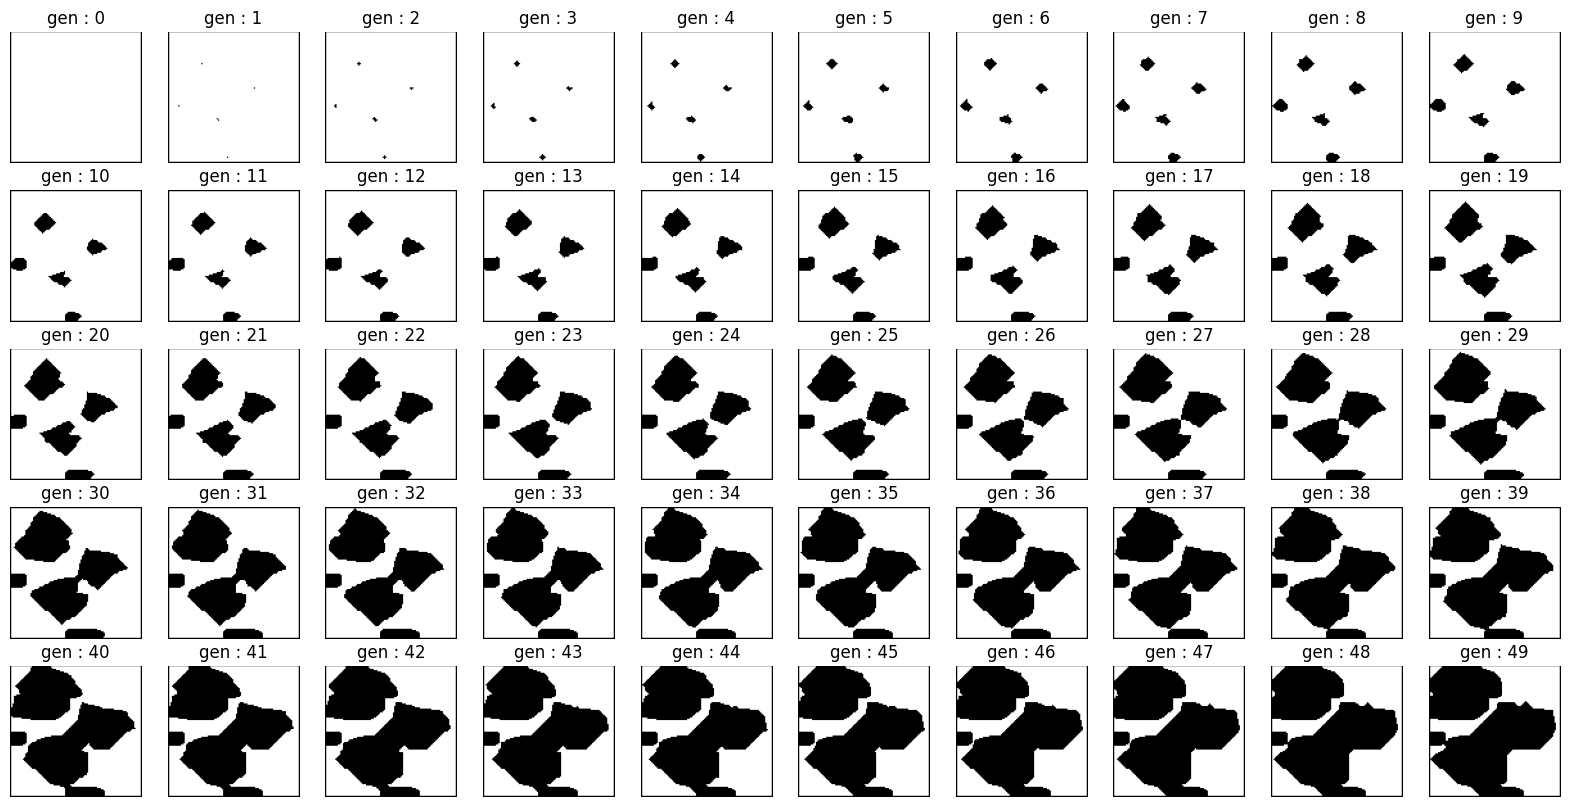

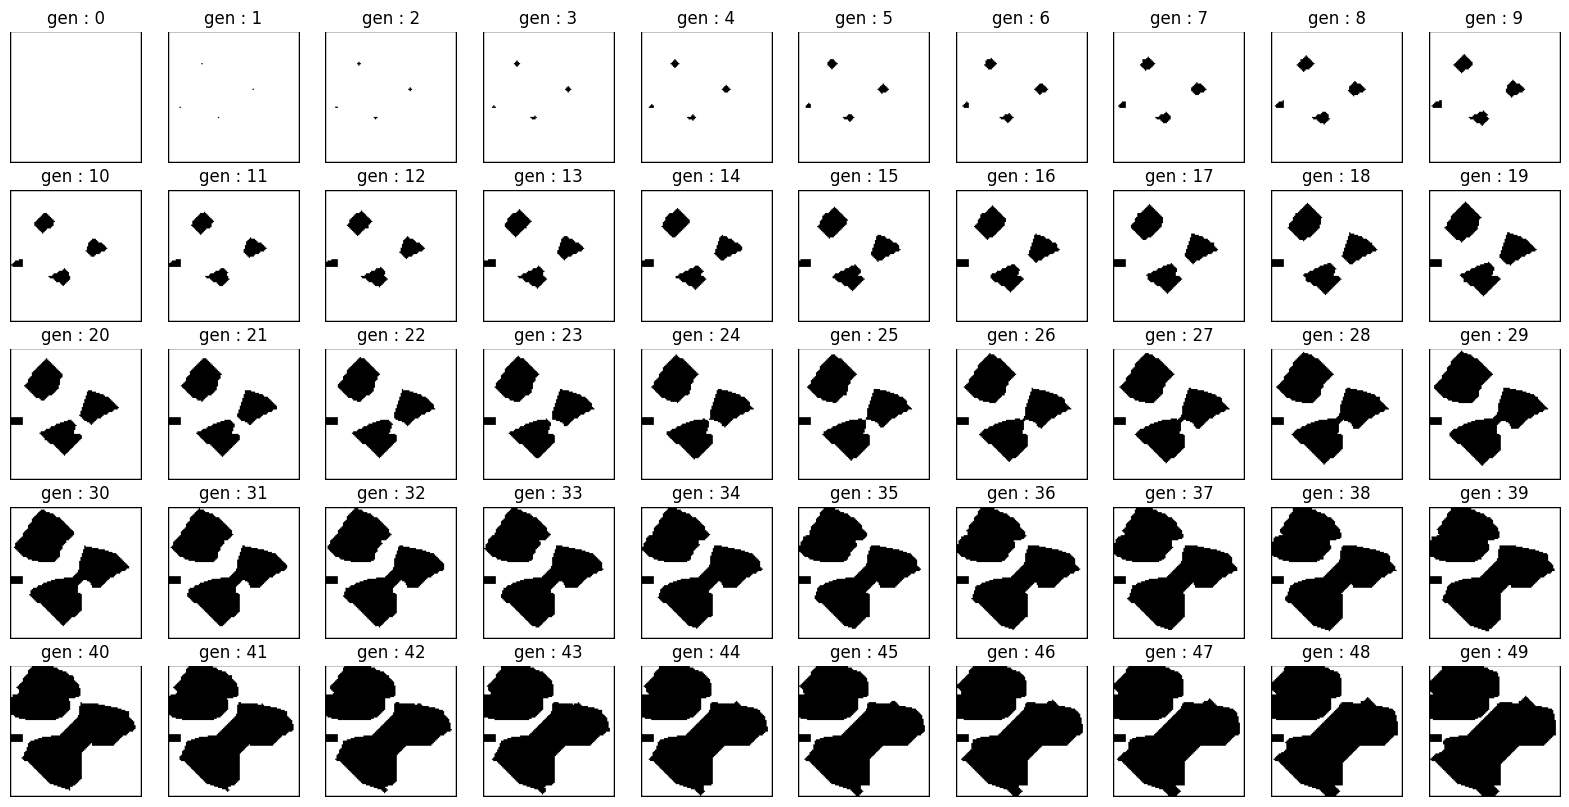

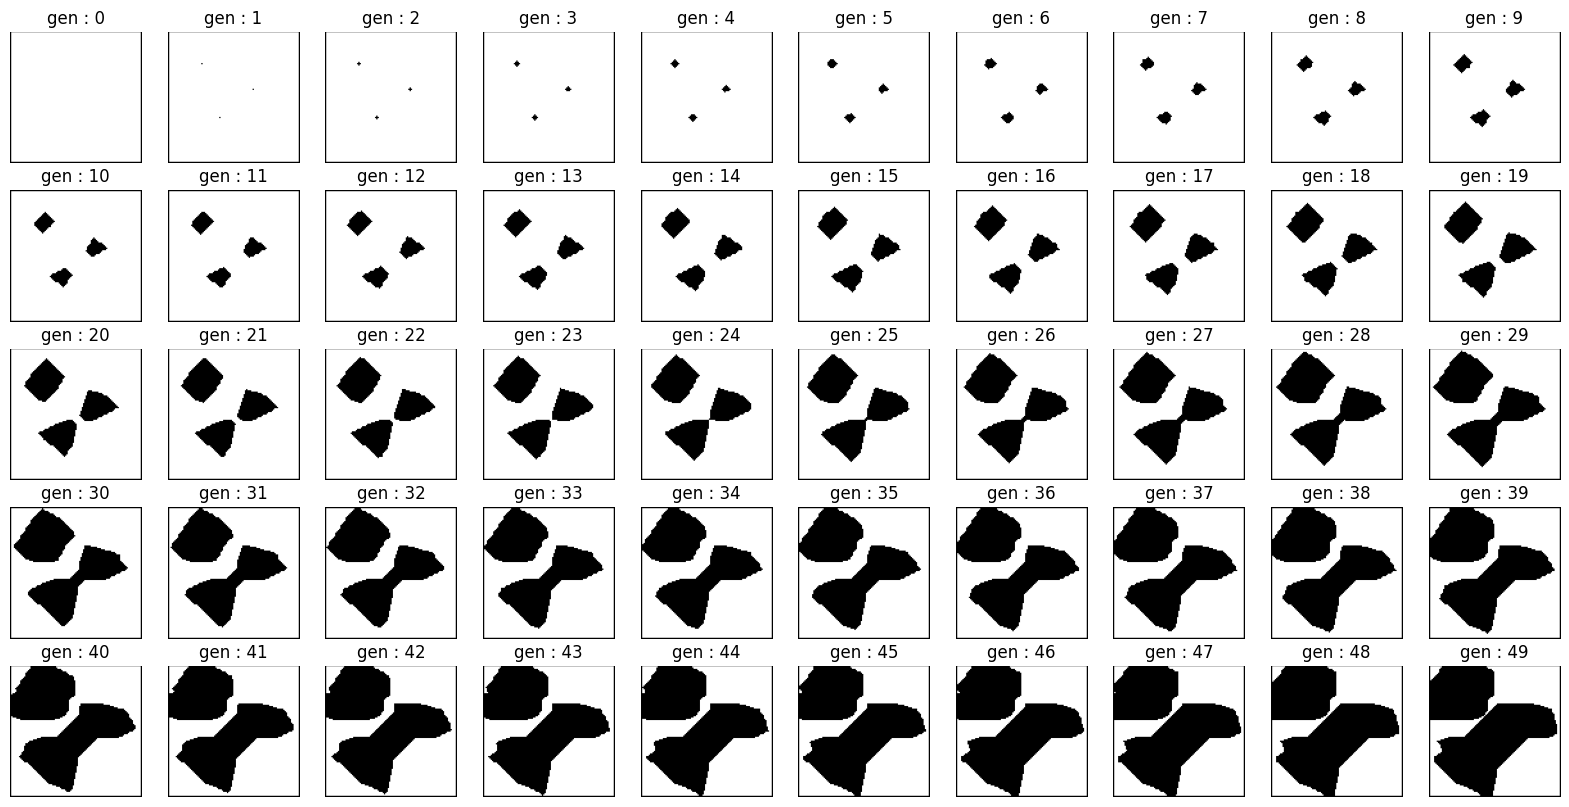

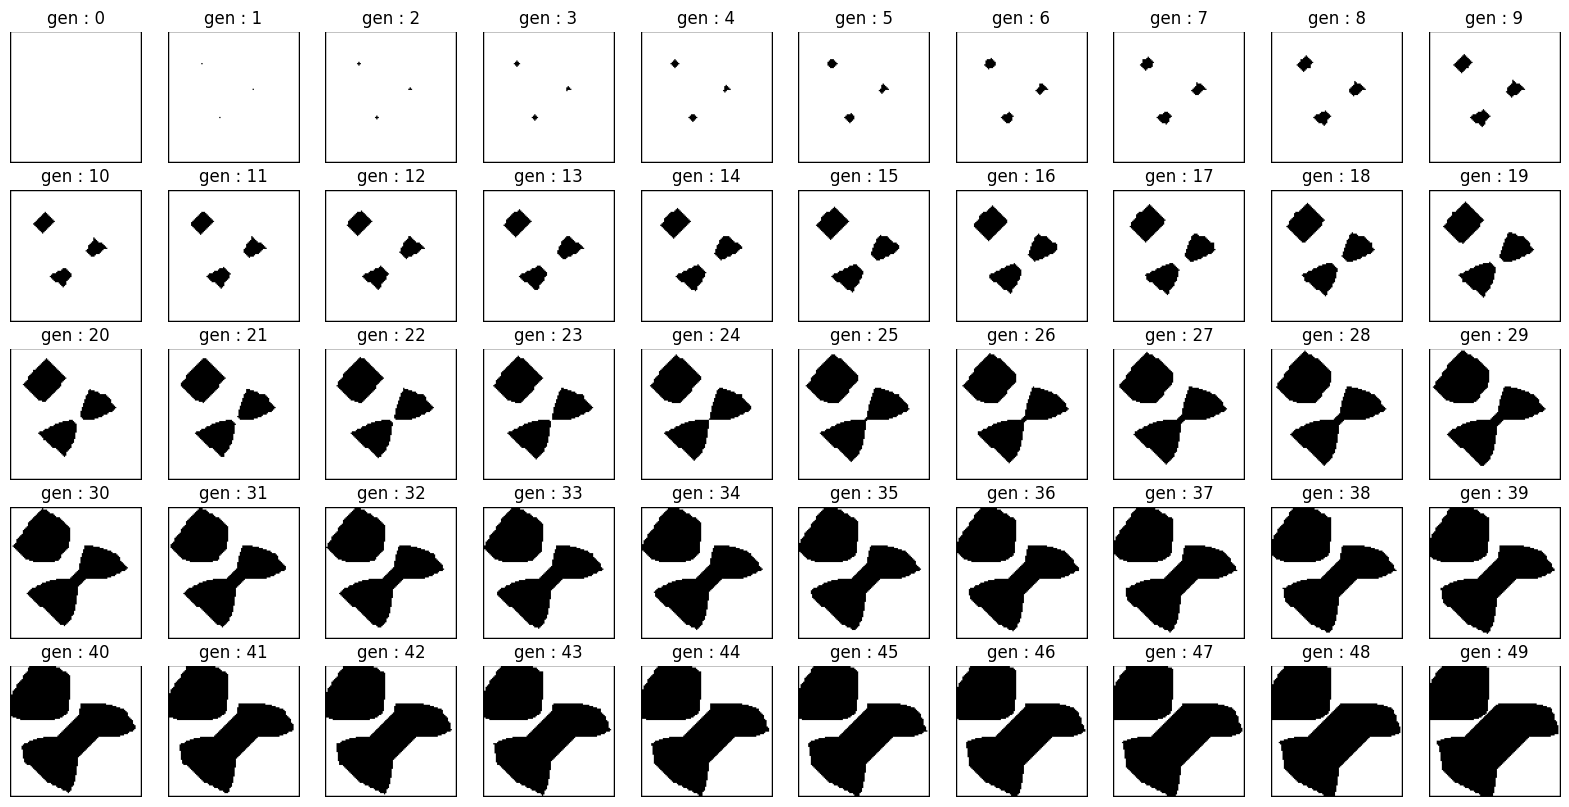

In [19]:
# sigma_list = [0.2, 0.4, 0.6, 0.8, 1.0]
sigma_list = [1.2, 1.4, 1.6, 1.8, 2.0]
for i in range(len(sigma_list)):
    gen_simul(X3[0], 400, 100, sigma_list[i], 50)

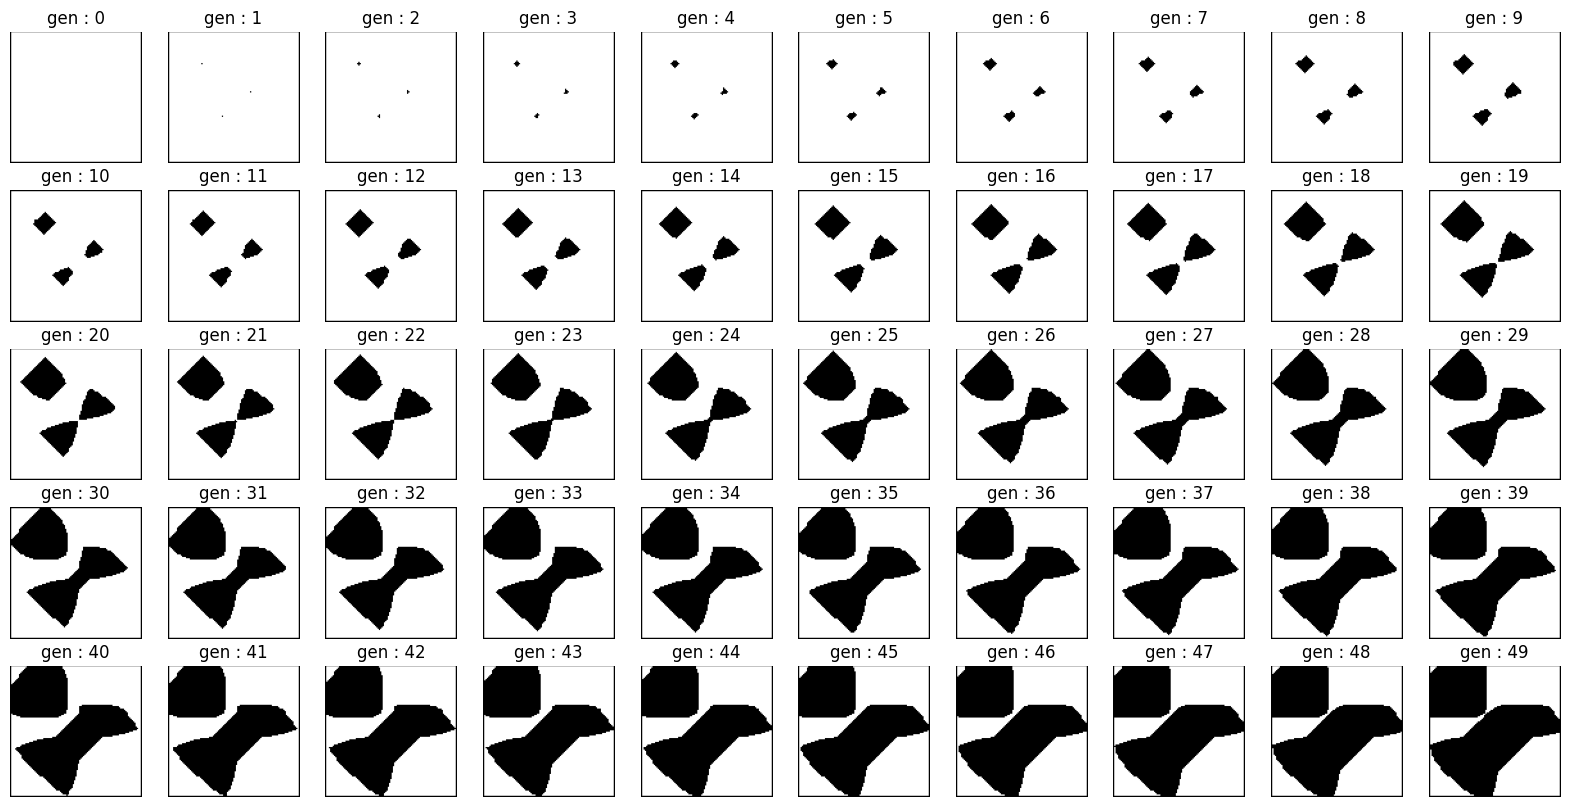

In [21]:
gen_simul(X3[0], 400, 100, 3, 50)

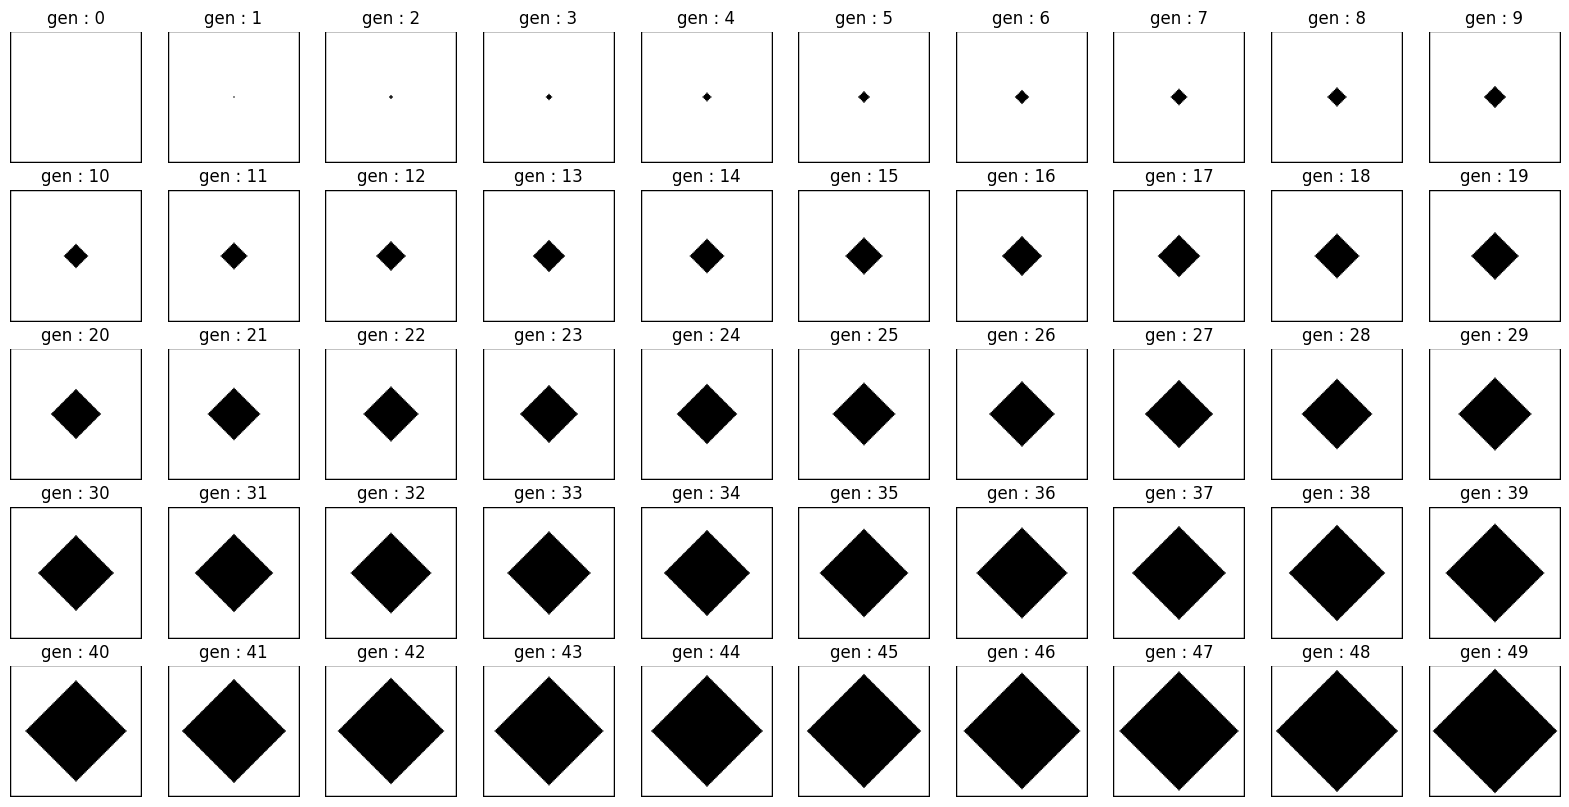

In [22]:
gen_simul(X1[0], 400, 100, 3, 50)